In [1]:
import sys
from loguru import logger
import pandas as pd

from src.balance import Balance
from src.cashflow import CashFlow
from src.simulation import Simulation
from src.variables import ENTITIES, ASSETS_LIAIBILITIES

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
logger.remove()
logger.add(sys.stderr, 
           format='|{level: <1}|  <level>{message}</level>',
           level="INFO")

1

In [4]:

# CASHFLOW
cashflow = CashFlow()
for entity in ENTITIES+ASSETS_LIAIBILITIES:
    cashflow.add_entity(entity)
    
# BALANCE
balance = Balance()
for entity in ASSETS_LIAIBILITIES:
    balance.add_entity(entity)
    
simulation = Simulation(start_date='2023-11-01', 
                        duration=12*30,
                        cashflow=cashflow, 
                        balance=balance)
simulation.run()

|INFO|  Total cashflow: $8,576 


|INFO|  Total net worth: $ 159,326 


|INFO|  Total cashflow: $-221,255 


|INFO|  Total net worth: $ 138,071 


|INFO|  Total cashflow: $6,381 


|INFO|  Total net worth: $ 147,674 


|INFO|  Total cashflow: $6,416 


|INFO|  Total net worth: $ 157,324 


|INFO|  Total cashflow: $6,452 


|INFO|  Total net worth: $ 167,020 


|INFO|  Total cashflow: $6,488 


|INFO|  Total net worth: $ 176,762 


|INFO|  Total cashflow: $6,524 


|INFO|  Total net worth: $ 186,550 


|INFO|  Total cashflow: $6,560 


|INFO|  Total net worth: $ 196,384 


|INFO|  Total cashflow: $6,597 


|INFO|  Total net worth: $ 206,266 


|INFO|  Total cashflow: $6,633 


|INFO|  Total net worth: $ 216,194 


|INFO|  Total cashflow: $6,669 


|INFO|  Total net worth: $ 226,169 


|INFO|  Total cashflow: $6,706 


|INFO|  Total net worth: $ 236,190 


|INFO|  Total cashflow: $-225,860 


|INFO|  Total net worth: $ 213,657 


|INFO|  Total cashflow: $1,773 


|INFO|  Total net worth:

|INFO|  Total cashflow: $7,658 


|INFO|  Total net worth: $ 1,553,203 


|INFO|  Total cashflow: $7,709 


|INFO|  Total net worth: $ 1,570,627 


|INFO|  Total cashflow: $7,760 


|INFO|  Total net worth: $ 1,588,138 


|INFO|  Total cashflow: $7,811 


|INFO|  Total net worth: $ 1,605,734 


|INFO|  Total cashflow: $7,862 


|INFO|  Total net worth: $ 1,623,417 


|INFO|  Total cashflow: $7,913 


|INFO|  Total net worth: $ 1,641,186 


|INFO|  Total cashflow: $7,964 


|INFO|  Total net worth: $ 1,659,042 


|INFO|  Total cashflow: $8,016 


|INFO|  Total net worth: $ 1,676,985 


|INFO|  Total cashflow: $8,067 


|INFO|  Total net worth: $ 1,695,015 


|INFO|  Total cashflow: $8,119 


|INFO|  Total net worth: $ 1,713,133 


|INFO|  Total cashflow: $8,171 


|INFO|  Total net worth: $ 1,731,339 


|INFO|  Total cashflow: $8,223 


|INFO|  Total net worth: $ 1,749,632 


|INFO|  Total cashflow: $8,275 


|INFO|  Total net worth: $ 1,768,014 


|INFO|  Total cashflow: $8,327 


|INF

In [5]:
cashflow_df, net_worth_df = simulation.get_results_dataframe()

In [6]:
cashflow_df

,Salary 1,Salary 2,Rent,Amenities,Transport,Entertainment,travelling,Food,Other,Bank Account,House,Triplex
2023-11-01,8026.666667,6020.000000,-1405.833333,-602.000000,-504.166667,-652.166667,-1003.333333,-802.666667,-500.833333,0.0,0.000000,0.000000
2023-12-01,8053.422222,6040.066667,-1411.690972,-604.006667,-508.368056,-654.340556,-1006.677778,-805.342222,-501.668056,0.0,0.000000,-229856.544188
2024-01-01,8080.266963,6060.200222,-1417.573018,-606.020022,-512.604456,-656.521691,-1010.033370,-808.026696,-502.504169,0.0,0.000000,-2246.669188
2024-02-01,8107.201186,6080.400890,-1423.479572,-608.040089,-516.876160,-658.710096,-1013.400148,-810.720119,-503.341676,0.0,0.000000,-2236.759917
2024-03-01,8134.225190,6100.668893,-1429.410737,-610.066889,-521.183461,-660.905797,-1016.778149,-813.422519,-504.180579,0.0,0.000000,-2226.816258
...,...,...,...,...,...,...,...,...,...,...,...,...
2053-06-01,26157.470139,19618.102604,0.000000,-1961.810260,-9594.851202,-2125.294449,-3269.683767,-2615.747014,-904.559004,0.0,-7346.942089,4575.834996
2053-07-01,26244.661706,19683.496279,0.000000,-1968.349628,-9674.808295,-2132.378764,-3280.582713,-2624.466171,-906.066602,0.0,-7358.423336,4609.253928
2053-08-01,26332.143911,19749.107934,0.000000,-1974.910793,-9755.431698,-2139.486693,-3291.517989,-2633.214391,-907.576713,0.0,-7369.942853,4642.787534
2053-09-01,26419.917724,19814.938293,0.000000,-1981.493829,-9836.726962,-2146.618315,-3302.489716,-2641.991772,-909.089341,0.0,-7381.500769,4676.436204


In [7]:
net_worth_df

,Bank Account,House,Triplex
2023-11-01,1.593257e+05,0.000000e+00,0.000000e+00
2023-12-01,-6.192948e+04,0.000000e+00,2.000000e+05
2024-01-01,-5.554897e+04,0.000000e+00,2.032232e+05
2024-02-01,-4.913269e+04,0.000000e+00,2.064566e+05
2024-03-01,-4.268056e+04,0.000000e+00,2.097002e+05
...,...,...,...
2053-06-01,3.935186e+06,2.504999e+06,2.390538e+06
2053-07-01,3.957779e+06,2.513349e+06,2.401484e+06
2053-08-01,3.980431e+06,2.521727e+06,2.412471e+06
2053-09-01,4.003142e+06,2.530133e+06,2.423501e+06


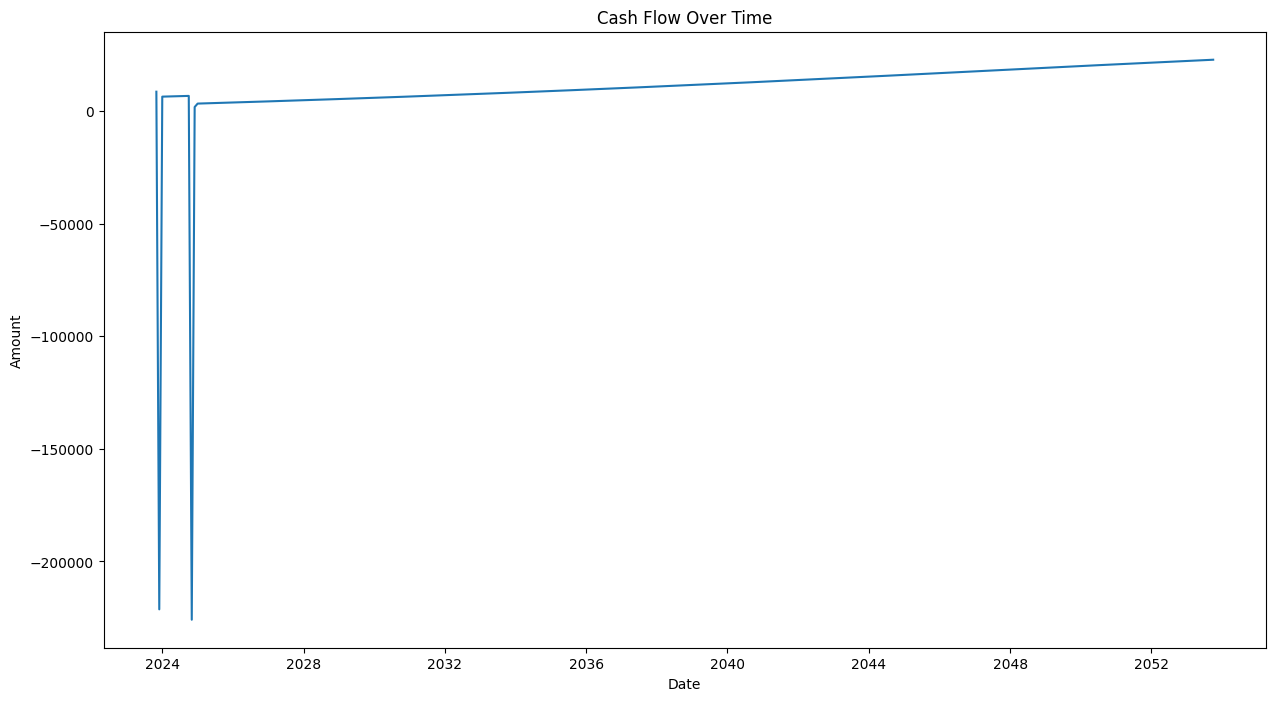

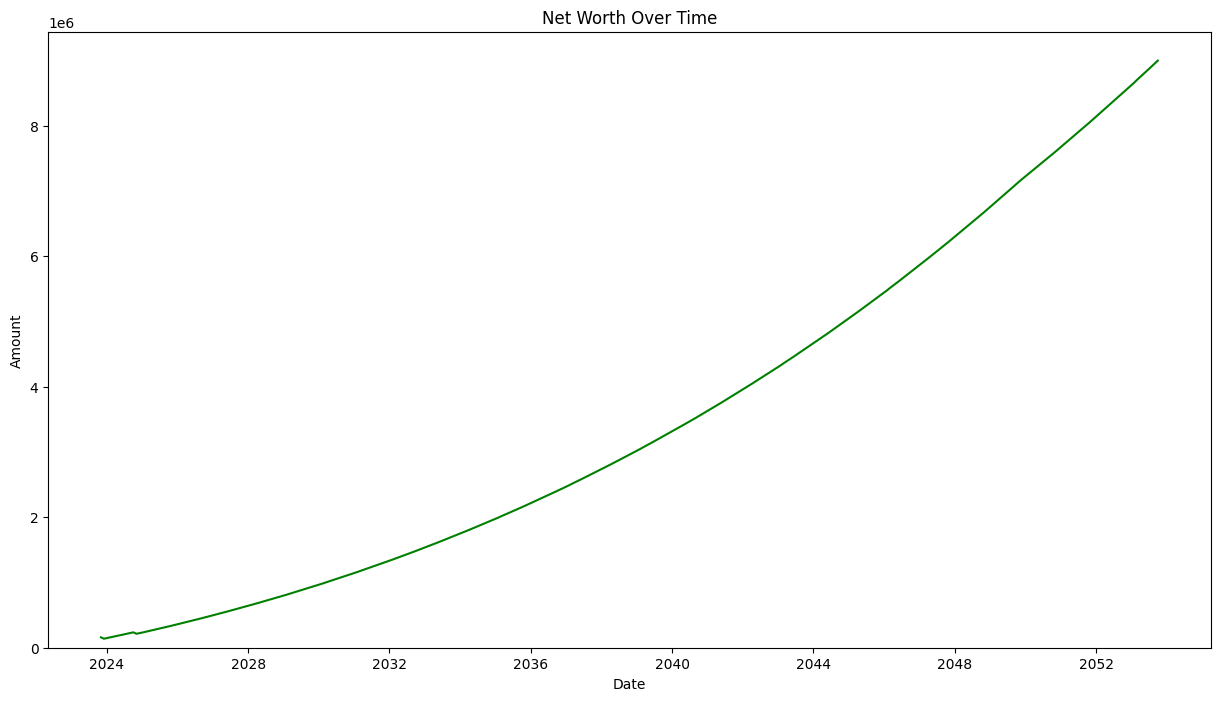

In [8]:
simulation.plot_results()